##### With unprocessed data

In [1]:
# Import Libraries required for the experiment
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import QuantileTransformer,MinMaxScaler,RobustScaler,StandardScaler
import random
import os
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder

random.seed(132)
# Initiate Seaborn Package with a particular Style
#sns.set(style="ticks", color_codes=True)


In [2]:
os.chdir('C:\\Users\\ankit\\Teaching with Vijay\\Linear Regression')

In [3]:
# Initiate Encoders which will be used for Categorical Variables
label_encoder = LabelEncoder()

# Prints all line without skipping
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# load the raw input dataset
articles=pd.read_csv('online_articles_data_1.csv')
articles.head()

,article,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,art_29734,http://mashable.com/2014/03/06/save-children-s...,308,7,626.0,0.524834,1.0,0.697613,10,1,1,0,4.683706,9,0.0,0.0,0.0,0.0,0.0,1,-1,568.0,196.500000,0,843300,146266.6667,0.0,3765.700000,2645.812170,3100.0,3100.0,3100.0,0,0.0,0.0,1.0,0,0,0,0,0.022225,0.022224,0.403489,0.022306,0.529755,0.418152,-0.018054,0.017572,0.027157,0.392857,0.607143,0.312397,0.100000,0.80,-0.202824,-0.600,-0.050000,0.7,-0.60,0.2,0.60,1200.0
1,art_29735,http://mashable.com/2014/12/25/toddler-crying-...,9,11,459.0,0.534940,1.0,0.615658,25,1,1,0,4.845316,8,0.0,1.0,0.0,0.0,0.0,0,-1,325.0,65.200000,0,843300,178700.0000,0.0,4263.215084,2129.134868,1500.0,1500.0,1500.0,0,1.0,0.0,0.0,0,0,0,0,0.025003,0.025483,0.025002,0.899134,0.025378,0.568660,0.099173,0.021786,0.008715,0.714286,0.285714,0.325303,0.033333,0.50,-0.481250,-0.625,-0.200000,0.0,0.00,0.5,0.00,1600.0
2,art_29736,http://mashable.com/2014/11/01/boko-haram-deni...,66,15,291.0,0.581395,1.0,0.662921,18,2,1,0,4.529210,8,0.0,0.0,1.0,0.0,0.0,0,-1,1100.0,415.166667,0,843300,269587.5000,0.0,3437.392296,1589.431491,2200.0,5800.0,4000.0,1,0.0,0.0,0.0,0,0,0,0,0.265780,0.025006,0.147576,0.025047,0.536591,0.327273,0.210227,0.020619,0.003436,0.857143,0.142857,0.358333,0.100000,0.80,-0.100000,-0.100,-0.100000,0.0,0.00,0.5,0.00,2200.0
3,art_29737,http://mashable.com/2014/09/29/yes-means-yes-s...,100,13,452.0,0.533487,1.0,0.663004,28,3,7,1,4.915929,8,0.0,0.0,0.0,0.0,0.0,0,-1,1200.0,406.285714,0,843300,336137.5000,0.0,11639.153850,4814.302835,2700.0,2700.0,2700.0,0,1.0,0.0,0.0,0,0,0,0,0.025001,0.180194,0.025001,0.744803,0.025001,0.484869,0.036636,0.028761,0.019912,0.590909,0.409091,0.395055,0.200000,0.90,-0.366667,-0.800,-0.008333,1.0,-0.25,0.5,0.25,19400.0
4,art_29738,http://mashable.com/2013/07/29/intel-microsoft...,528,11,506.0,0.486922,1.0,0.624595,9,4,1,1,4.932806,10,0.0,0.0,0.0,0.0,1.0,0,4,24000.0,3648.714286,0,843300,132320.0000,0.0,24000.000000,3882.654710,2000.0,2200.0,2100.0,1,0.0,0.0,0.0,0,0,0,0,0.020020,0.020002,0.120586,0.020001,0.819392,0.457751,-0.014918,0.021739,0.019763,0.523810,0.476190,0.326860,0.100000,0.85,-0.338333,-1.000,-0.050000,0.0,0.00,0.5,0.00,594.0


In [4]:
articles.shape

(9911, 62)

In [5]:
articles.columns

Index(['article', 'url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' 

In [6]:
#Assign Temporary Storage of the core dataset (For larger sets this step must be avoided)
temp = articles.copy()

In [7]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9911 entries, 0 to 9910
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   article                         9911 non-null   object 
 1   url                             9911 non-null   object 
 2    timedelta                      9911 non-null   int64  
 3    n_tokens_title                 9911 non-null   int64  
 4    n_tokens_content               9902 non-null   float64
 5    n_unique_tokens                9911 non-null   float64
 6    n_non_stop_words               9911 non-null   float64
 7    n_non_stop_unique_tokens       9911 non-null   float64
 8    num_hrefs                      9911 non-null   int64  
 9    num_self_hrefs                 9911 non-null   int64  
 10   num_imgs                       9911 non-null   int64  
 11   num_videos                     9911 non-null   int64  
 12   average_token_length           99

#### Missing Value Analysis

In [8]:
# Retrieve Columns that have Null Value 
null_columns=temp.columns[temp.isnull().any()]


In [9]:
temp[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9911 entries, 0 to 9910
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_content               9902 non-null   float64
 1    average_token_length           9901 non-null   float64
 2    data_channel_is_lifestyle      9899 non-null   float64
 3    data_channel_is_entertainment  9899 non-null   float64
 4    data_channel_is_bus            9890 non-null   float64
 5    data_channel_is_socmed         9888 non-null   float64
 6    data_channel_is_tech           9900 non-null   float64
 7    kw_max_avg                     9899 non-null   float64
 8    kw_avg_avg                     9899 non-null   float64
 9    self_reference_min_shares      9899 non-null   float64
 10   self_reference_max_shares      9899 non-null   float64
 11   weekday_is_tuesday             9899 non-null   float64
 12   weekday_is_wednesday           98

In [10]:
temp = temp.dropna()

In [11]:
temp.shape

(9841, 62)

In [12]:
# Arrive at the logical columns that can be Categoric 
# converting coloumns into string to make them categorical
temp.iloc[:,[14,15,16,17,18,19,32,33,34,35,36,37,38,39]]=temp.iloc[:,[14,15,16,17,18,19,32,33,34,35,36,37,38,39]].astype(str)


In [14]:
temp.describe(include ='all',percentiles = [.25, .5, .75])

,article,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,9841,9841,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.00000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841,9841,9841,9841,9841,9841,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841,9841,9841,9841,9841,9841,9841,9841,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000
unique,9841,9841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,art_33528,http://mashable.com/2014/07/14/airbus-airplane...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9292,8136,8273,9237,8011,7770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8224,8000,8010,8013,8392,9249,9158,8566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,353.712123,10.391119,547.706534,0.602295,1.077025,0.739698,10.98303,3.303120,4.438065,1.283000,4.553171,7.224266,NaN,NaN,NaN,NaN,NaN,NaN,26.154151,1178.467725,314.017874,13096.695559,752863.875622,260183.062621,1125.410354,5713.832043,3145.762024,3970.510960,10561.852352,6432.636176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.187950,0.136882,0.216058,0.223228,0.235781,0.443185,0.120133,0.039691,0.016557,0.683337,0.287600,0.353840,0.094390,0.758947,-0.260531,-0.524423,-0.107615,0.279859,0.073161,0.341216,0.157319,3295.166751
std,NaN,NaN,214.574082,2.092369,465.794490,7.062344,10.495380,6.547281,11.49147,3.868636,8.030825,4.334383,0.832318,1.904585,NaN,NaN,NaN,NaN,NaN,NaN,69.630879,3224.899389,502.092456,53489.729597,214616.872624,135672.489469,1142.241350,6354.636788,1339.691740,20468.819767,44235.635966,25291.637068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.265865,0.214202,0.281923,0.294229,0.290814,0.116268,0.095737,0.017208,0.010528,0.187482,0.153777,0.103145,0.068549,0.245609,0.128761,0.289333,0.096874,0.321954,0.266280,0.188827,0.226949,8475.126174
min,NaN,NaN,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.372708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000

In [14]:
del temp['article'] ; del temp['url']

In [15]:
cat_data = temp[temp.columns[temp.dtypes=='object']]
num_data = temp[temp.columns[temp.dtypes!='object']]


In [16]:
enc_df = cat_data.apply(LabelEncoder().fit_transform)


In [17]:
enc_df = enc_df.reset_index(drop=True)
num_data = num_data.reset_index(drop=True)
dataset=pd.concat([num_data,enc_df],axis=1)
print(dataset.shape)
dataset.head()

(9841, 60)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
0,308,7,626.0,0.524834,1.0,0.697613,10,1,1,0,4.683706,9,-1,568.0,196.500000,0,843300,146266.6667,0.0,3765.700000,2645.812170,3100.0,3100.0,3100.0,0.022225,0.022224,0.403489,0.022306,0.529755,0.418152,-0.018054,0.017572,0.027157,0.392857,0.607143,0.312397,0.100000,0.80,-0.202824,-0.600,-0.050000,0.7,-0.60,0.2,0.60,1200.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,9,11,459.0,0.534940,1.0,0.615658,25,1,1,0,4.845316,8,-1,325.0,65.200000,0,843300,178700.0000,0.0,4263.215084,2129.134868,1500.0,1500.0,1500.0,0.025003,0.025483,0.025002,0.899134,0.025378,0.568660,0.099173,0.021786,0.008715,0.714286,0.285714,0.325303,0.033333,0.50,-0.481250,-0.625,-0.200000,0.0,0.00,0.5,0.00,1600.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,66,15,291.0,0.581395,1.0,0.662921,18,2,1,0,4.529210,8,-1,1100.0,415.166667,0,843300,269587.5000,0.0,3437.392296,1589.431491,2200.0,5800.0,4000.0,0.265780,0.025006,0.147576,0.025047,0.536591,0.327273,0.210227,0.020619,0.003436,0.857143,0.142857,0.358333,0.100000,0.80,-0.100000,-0.100,-0.100000,0.0,0.00,0.5,0.00,2200.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,100,13,452.0,0.533487,1.0,0.663004,28,3,7,1,4.915929,8,-1,1200.0,406.285714,0,843300,336137.5000,0.0,11639.153850,4814.302835,2700.0,2700.0,2700.0,0.025001,0.180194,0.025001,0.744803,0.025001,0.484869,0.036636,0.028761,0.019912,0.590909,0.409091,0.395055,0.200000,0.90,-0.366667,-0.800,-0.008333,1.0,-0.25,0.5,0.25,19400.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,528,11,506.0,0.486922,1.0,0.624595,9,4,1,1,4.932806,10,4,24000.0,3648.714286,0,843300,132320.0000,0.0,24000.000000,3882.654710,2000.0,2200.0,2100.0,0.020020,0.020002,0.120586,0.020001,0.819392,0.457751,-0.014918,0.021739,0.019763,0.523810,0.476190,0.326860,0.100000,0.85,-0.338333,-1.000,-0.050000,0.0,0.00,0.5,0.00,594.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [18]:
dataset.describe(include='all')

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.00000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000
mean,353.712123,10.391119,547.706534,0.602295,1.077025,0.739698,10.98303,3.303120,4.438065,1.283000,4.553171,7.224266,26.154151,1178.467725,314.017874,13096.695559,752863.875622,260183.062621,1125.410354,5713.832043,3145.762024,3970.510960,10561.852352,6432.636176,0.187950,0.136882,0.216058,0.223228,0.235781,0.443185,0.120133,0.039691,0.016557,0.683337,0.287600,0.353840,0.094390,0.758947,-0.260531,-0.524423,-0.107615,0.279859,0.073161,0.341216,0.157319,3295.166751,0.055787,0.173255,0.159333,0.061376,0.185957,0.210446,0.164313,0.187074,0.186058,0.185753,0.147241,0.060156,0.069404,0.129560
std,214.574082,2.092369,465.794490,7.062344,10.495380,6.547281,11.49147,3.868636,8.030825,4.334383,0.832318,1.904585,69.630879,3224.899389,502.092456,53489.729597,214616.872624,135672.489469,1142.241350,6354.636788,1339.691740,20468.819767,44235.635966,25291.637068,0.265865,0.214202,0.281923,0.294229,0.290814,0.116268,0.095737,0.017208,0.010528,0.187482,0.153777,0.103145,0.068549,0.245609,0.128761,0.289333,0.096874,0.321954,0.266280,0.188827,0.226949,8475.126174,0.229522,0.378487,0.366005,0.240031,0.389092,0.407646,0.370578,0.389991,0.389174,0.388927,0.354364,0.237789,0.254152,0.335836
min,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.372708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,9.000000,248.000000,0.471698,1.000000,0.625641,4.00000,1.000000,1.000000,0.000000,4.480447,6.000000,-1.000000,447.000000,140.600000,0.000000,843300.000000,172640.000000,0.000000,3569.401335,2389.707134,666.000000,1100.000000,999.000000,0.025079,0.025014,0.028571,0.028572,0.028574,0.394784,0.057456,0.028355,0.009615,0.600000,0.186047,0.306494,0.050000,0.600000,-0.329167,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,957.000000,0.000000,0.000000,0.000000,

In [19]:
datasetmain = dataset.copy()

In [20]:
dataset= dataset[dataset[' shares']!=0] ### Make to note to show later

In [21]:
y = dataset[' shares']
X = dataset.drop([' shares'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)


In [22]:
dataset.shape

(9841, 60)

In [23]:
X_train.shape

(6888, 59)

#### Modelling and Validation


In [24]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def regression_results(y_true, y_pred):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    MAPE = mean_absolute_percentage_error(y_true,y_pred)
    print('MAPE', MAPE )
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [25]:
##### Modelling
from statsmodels.api import OLS
import statsmodels.api as sm1
model1 = OLS(y_train,X_train.astype(float)).fit()
results1=model1.summary(alpha=0.05)
print(results1)

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     5.309
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           3.22e-34
Time:                        14:43:25   Log-Likelihood:                -72482.
No. Observations:                6888   AIC:                         1.451e+05
Df Residuals:                    6830   BIC:                         1.455e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
 timedelta  

In [27]:
y_pred_test = model1.predict(X_test)

print('------------------------------')
print('TESTING RESULTS OF LINEAR REGRESSION MODEL')
regression_results(y_test,y_pred_test)


------------------------------
TESTING RESULTS OF LINEAR REGRESSION MODEL
MAPE 378.09325961535706
MAE:  2863.6014
MSE:  42003870.1121
RMSE:  6481.0393


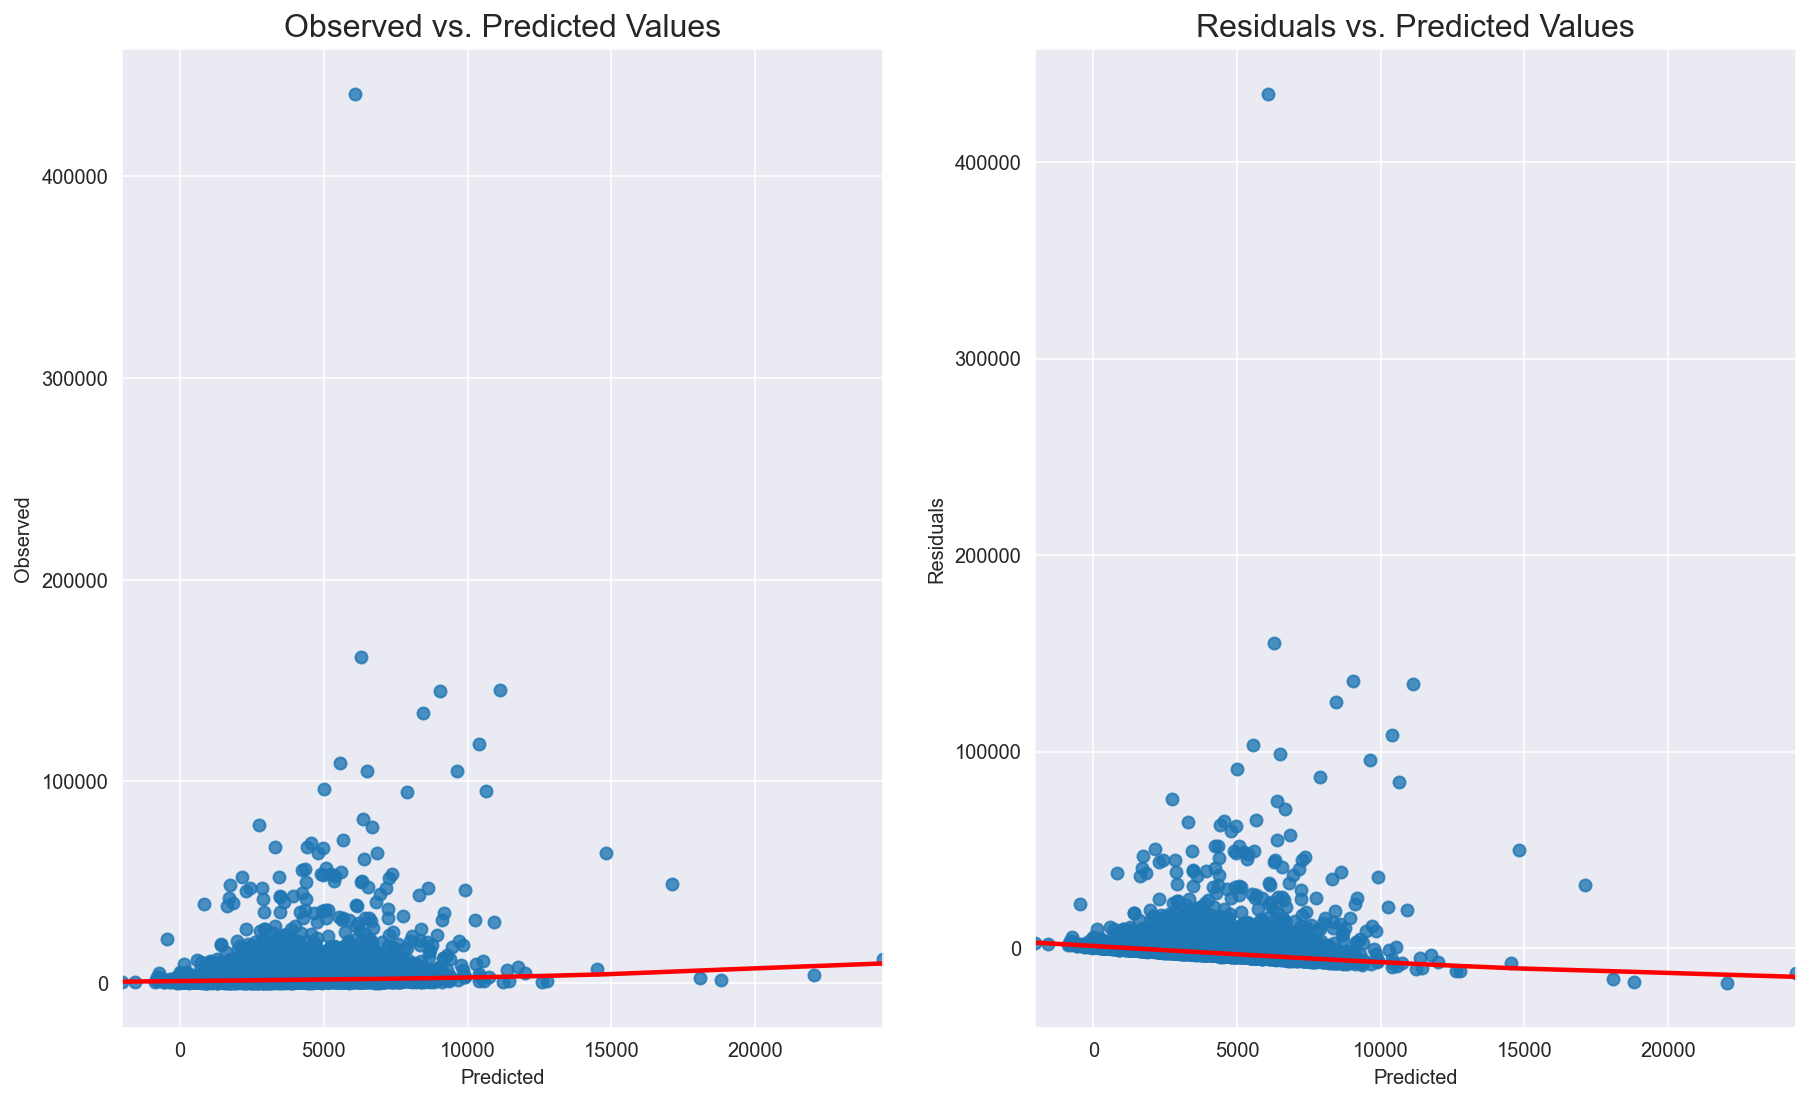

In [28]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model1, y_train)    

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns #independent data
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data[vif_data['VIF']>10]


C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
3,n_unique_tokens,5.656591e+04
4,n_non_stop_words,6.094000e+05
5,n_non_stop_unique_tokens,3.409467e+04
10,average_token_length,1.206477e+01
13,kw_max_min,1.371822e+01
14,kw_avg_min,1.426856e+01
20,kw_avg_avg,1.186448e+01
23,self_reference_avg_sharess,1.437222e+01
24,LDA_00,4.191342e+08
25,LDA_01,2.720667e+08


### Conclusions

1. Only 3-4% variation is explained by using all variables without any pre-processing

2. Assumptions of linearity seems fulfilled but heteroskedasticity seems present

3. Multicoliearity seems present

4. Few variables needs to be removed using feature selection technique. We will not use PCA because we want to explain results in their original form.

##### With Processed Data

In [1]:
# Import Libraries required for the experiment
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import QuantileTransformer,MinMaxScaler,RobustScaler,StandardScaler
import random
import os
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE
random.seed(132)
# Initiate Seaborn Package with a particular Style
sns.set(style="ticks", color_codes=True)

# Initiate Encoders which will be used for Categorical Variables
label_encoder = LabelEncoder()

# Prints all line without skipping
pd.set_option('display.max_rows', None)
os.chdir('C:\\Users\\ankit\\Teaching with Vijay\\Linear Regression')


In [2]:
# load the raw input dataset
articles=pd.read_csv('online_articles_data_1.csv')
articles.head()



,article,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,art_29734,http://mashable.com/2014/03/06/save-children-s...,308,7,626.0,0.524834,1.0,0.697613,10,1,...,0.100000,0.80,-0.202824,-0.600,-0.050000,0.7,-0.60,0.2,0.60,1200.0
1,art_29735,http://mashable.com/2014/12/25/toddler-crying-...,9,11,459.0,0.534940,1.0,0.615658,25,1,...,0.033333,0.50,-0.481250,-0.625,-0.200000,0.0,0.00,0.5,0.00,1600.0
2,art_29736,http://mashable.com/2014/11/01/boko-haram-deni...,66,15,291.0,0.581395,1.0,0.662921,18,2,...,0.100000,0.80,-0.100000,-0.100,-0.100000,0.0,0.00,0.5,0.00,2200.0
3,art_29737,http://mashable.com/2014/09/29/yes-means-yes-s...,100,13,452.0,0.533487,1.0,0.663004,28,3,...,0.200000,0.90,-0.366667,-0.800,-0.008333,1.0,-0.25,0.5,0.25,19400.0
4,art_29738,http://mashable.com/2013/07/29/intel-microsoft...,528,11,506.0,0.486922,1.0,0.624595,9,4,...,0.100000,0.85,-0.338333,-1.000,-0.050000,0.0,0.00,0.5,0.00,594.0


In [3]:
#Assign Temporary Storage of the core dataset (For larger sets this step must be avoided)
temp=articles.copy()

In [4]:

# Arrive at the logical columns that can be Categoric
# Conversion of String values to NaN if the real value is supposed to be Numeric
temp.iloc[:,[14,15,16,17,18,19,32,33,34,35,36,37,38,39]]=temp.iloc[:,[14,15,16,17,18,19,32,33,34,35,36,37,38,39]].apply(lambda s: pd.to_numeric(s, errors='coerce'))

# Retrieve Columns that have Null Value 
null_columns=temp.columns[temp.isnull().any()]

# Function to Point Out the Columns & Rows that have null values 
for i in range(1,len(null_columns)):
    print(null_columns[i])
    print('____________________________________________________________')
    print((pd.notnull(temp)[null_columns[i]]).value_counts())
    print(temp[(pd.isnull(temp)[null_columns[i]])][null_columns[i]])
    print('============================================================')


 average_token_length
____________________________________________________________
True     9901
False      10
Name:  average_token_length, dtype: int64
9010   NaN
9011   NaN
9012   NaN
9013   NaN
9014   NaN
9015   NaN
9016   NaN
9017   NaN
9018   NaN
9019   NaN
Name:  average_token_length, dtype: float64
 data_channel_is_lifestyle
____________________________________________________________
True     9899
False      12
Name:  data_channel_is_lifestyle, dtype: int64
8493   NaN
8494   NaN
8495   NaN
8496   NaN
8497   NaN
8498   NaN
8499   NaN
8500   NaN
8501   NaN
8502   NaN
8503   NaN
8504   NaN
Name:  data_channel_is_lifestyle, dtype: float64
 data_channel_is_entertainment
____________________________________________________________
True     9899
False      12
Name:  data_channel_is_entertainment, dtype: int64
8493   NaN
8494   NaN
8495   NaN
8496   NaN
8497   NaN
8498   NaN
8499   NaN
8500   NaN
8501   NaN
8502   NaN
8503   NaN
8504   NaN
Name:  data_channel_is_entertainment, dtype: f

### Missing Value Treatment

In [5]:
# Identify Categorical Variables for Better Automation of the entire script
temp1=temp.head()
temp1.iloc[:,[14,15,16,17,18,19,32,33,34,35,36,37,38,39]] = temp1.iloc[:,[14,15,16,17,18,19,32,33,34,35,36,37,38,39]].astype(str)
categoric_variables = temp1.columns[temp1.dtypes=='object']
del temp1

# Categorical Imputation
for i in range(3,len(categoric_variables)):
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(np.nan,temp[categoric_variables[i]].mode()[0])
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(to_replace ="NaN", 
                 value =0)
    temp[categoric_variables[i]].fillna(0, inplace = True) 

# Dropping Text Variables
temp=temp.drop(temp.columns[:2],axis=1)

# Numeric Imputation
from sklearn.impute import SimpleImputer
mean_imp = SimpleImputer(missing_values=np.nan, strategy="mean")

# Mean Imputation for Numeric Variables
numeric_variables = temp.columns[temp.dtypes!='object']
i=1
for i in range(1,len(numeric_variables)):
    if(temp.columns[i] in numeric_variables):
       temp.iloc[:,[i]] = mean_imp.fit_transform(temp.iloc[:,[i]])
       temp[temp.columns[i]]=temp[temp.columns[i]].replace(to_replace ="NaN", 
                 value =0)
       temp[temp.columns[i]].fillna(0, inplace = True) 


C:\Users\ankit\anaconda3\lib\site-packages\pandas\core\indexing.py:1754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [6]:

# Making Categoric for String Variables   
temp[' weekday_is_monday'] = temp[' weekday_is_monday'].astype(str)
temp[' weekday_is_tuesday'] = temp[' weekday_is_tuesday'].astype(str)
temp[' weekday_is_wednesday'] = temp[' weekday_is_wednesday'].astype(str)
temp[' weekday_is_thursday'] = temp[' weekday_is_thursday'].astype(str)
temp[' weekday_is_friday'] = temp[' weekday_is_friday'].astype(str)
temp[' weekday_is_saturday'] = temp[' weekday_is_saturday'].astype(str)
temp[' weekday_is_sunday'] = temp[' weekday_is_sunday'].astype(str)
   
temp[' data_channel_is_lifestyle'] = temp[' data_channel_is_lifestyle'].astype(str)
temp[' data_channel_is_entertainment'] = temp[' data_channel_is_entertainment'].astype(str)
temp[' data_channel_is_bus'] = temp[' data_channel_is_bus'].astype(str)
temp[' data_channel_is_socmed'] = temp[' data_channel_is_socmed'].astype(str)
temp[' data_channel_is_tech'] = temp[' data_channel_is_tech'].astype(str)
temp[' data_channel_is_world'] = temp[' data_channel_is_world'].astype(str)

temp[' is_weekend'] = temp[' is_weekend'].astype(str)




### EDA

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankit\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibil

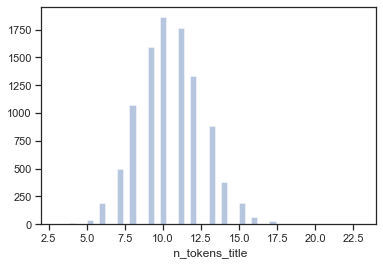

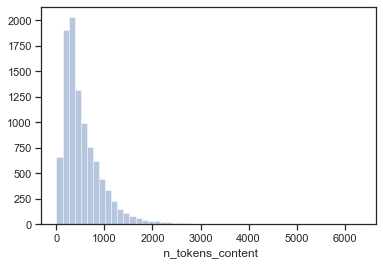

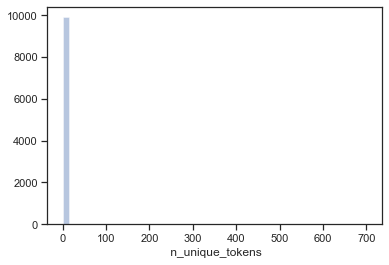

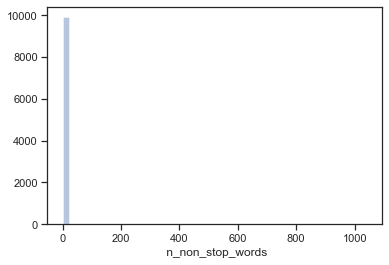

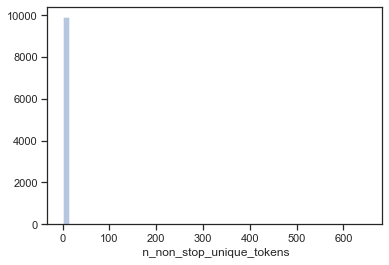

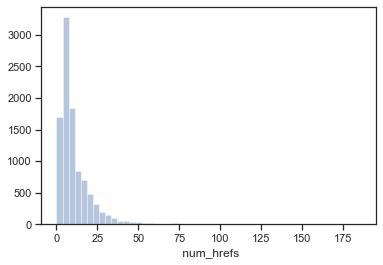

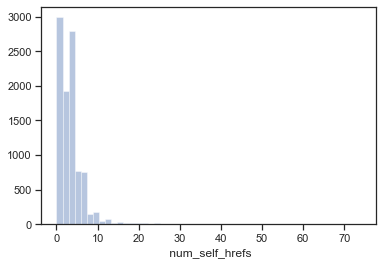

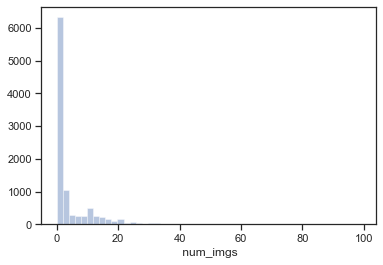

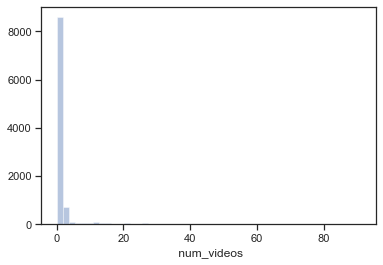

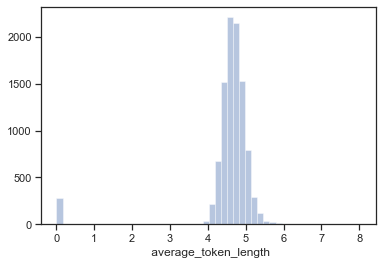

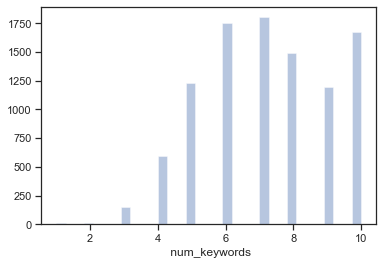

<Figure size 432x288 with 0 Axes>

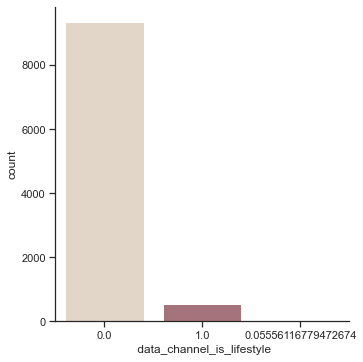

<Figure size 432x288 with 0 Axes>

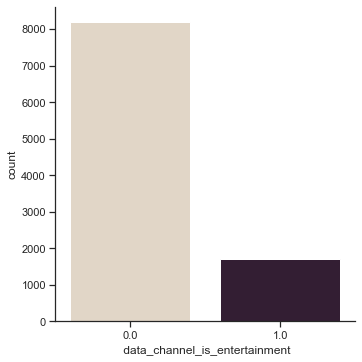

<Figure size 432x288 with 0 Axes>

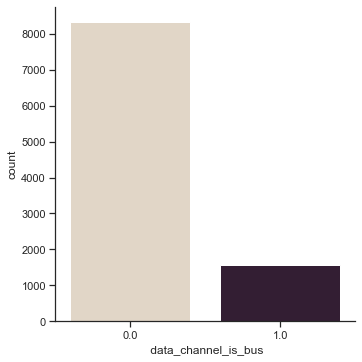

<Figure size 432x288 with 0 Axes>

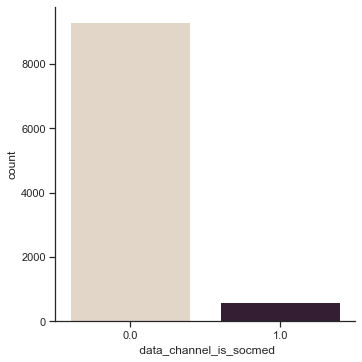

<Figure size 432x288 with 0 Axes>

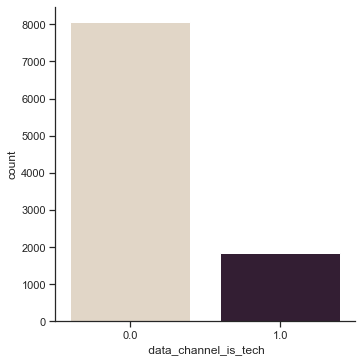

<Figure size 432x288 with 0 Axes>

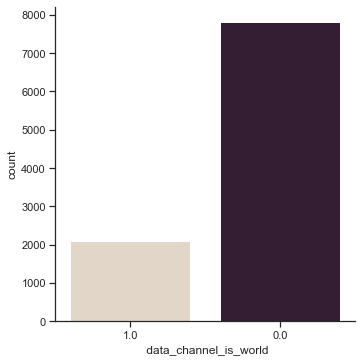

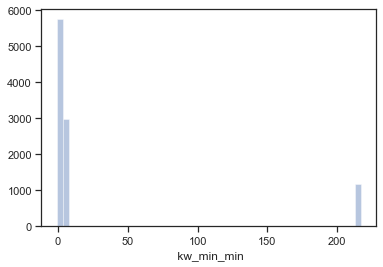

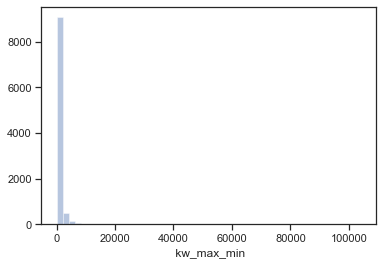

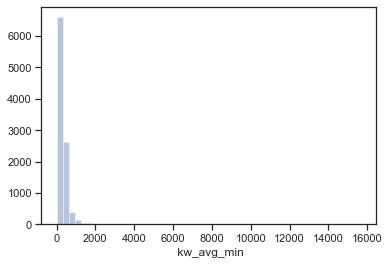

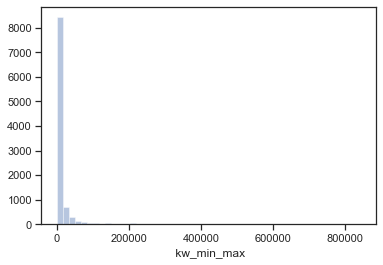

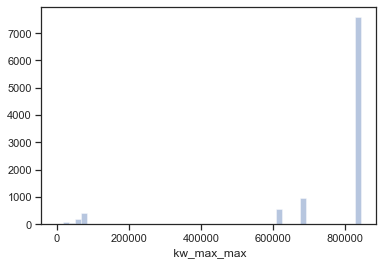

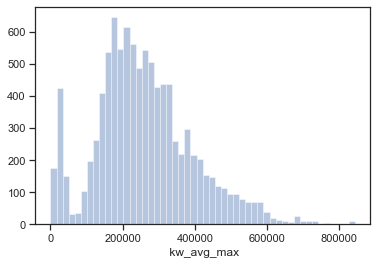

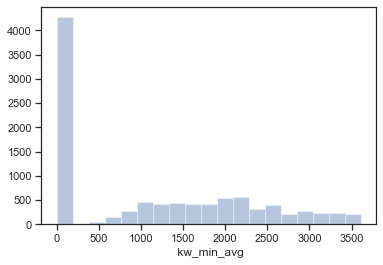

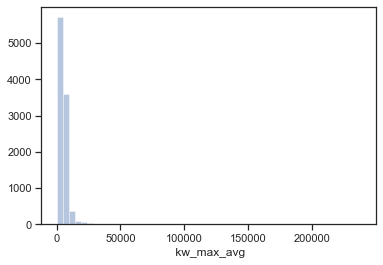

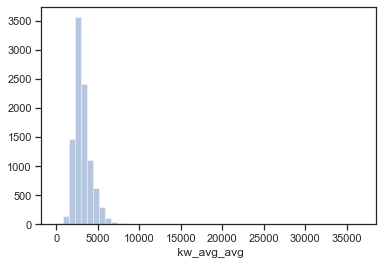

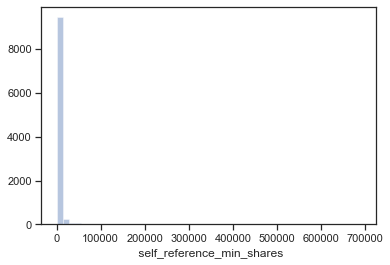

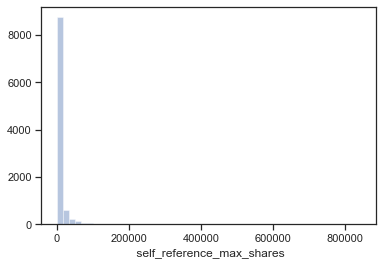

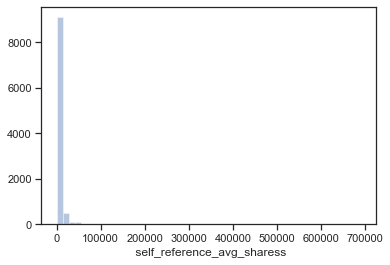

<Figure size 432x288 with 0 Axes>

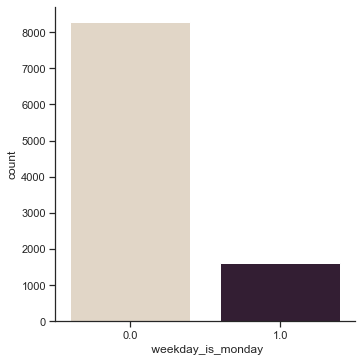

<Figure size 432x288 with 0 Axes>

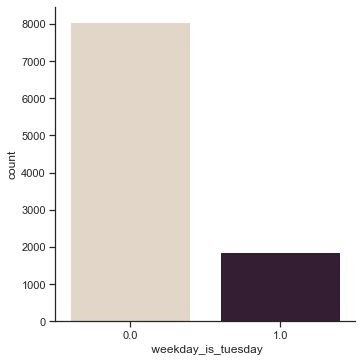

<Figure size 432x288 with 0 Axes>

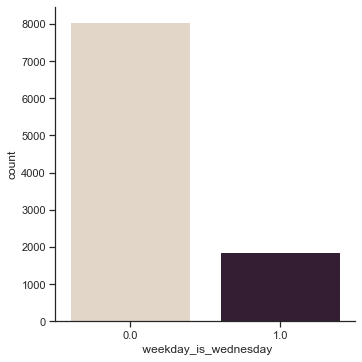

<Figure size 432x288 with 0 Axes>

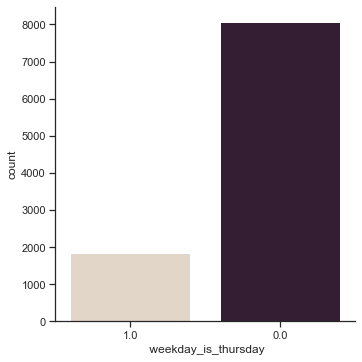

<Figure size 432x288 with 0 Axes>

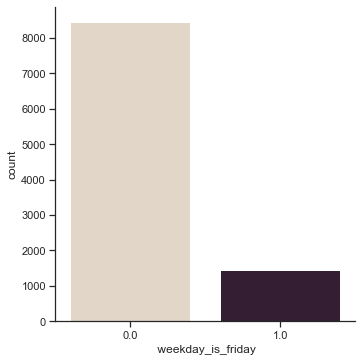

<Figure size 432x288 with 0 Axes>

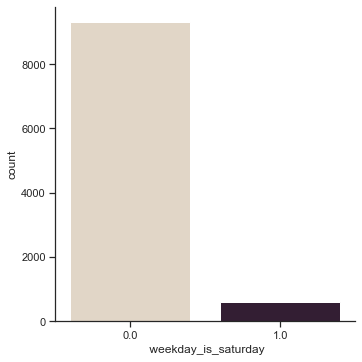

<Figure size 432x288 with 0 Axes>

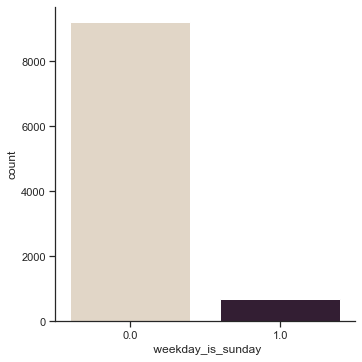

<Figure size 432x288 with 0 Axes>

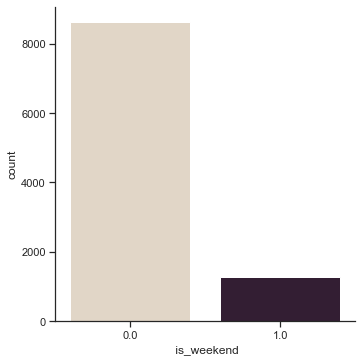

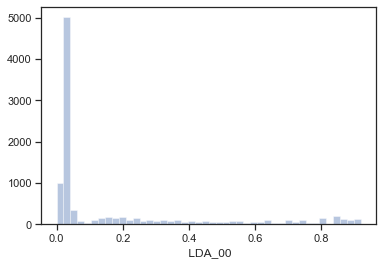

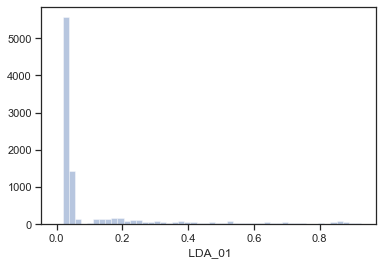

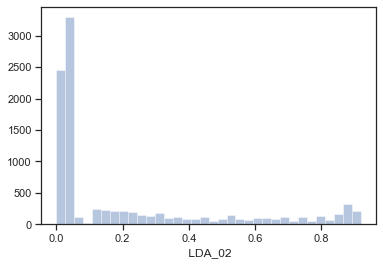

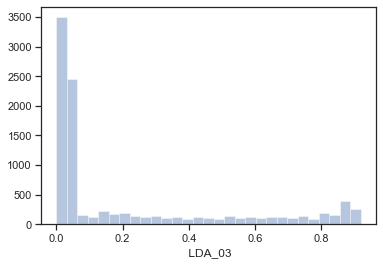

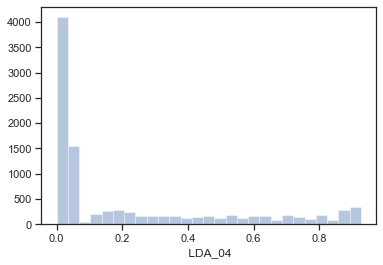

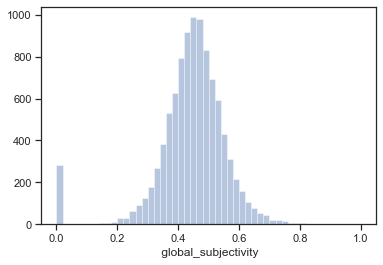

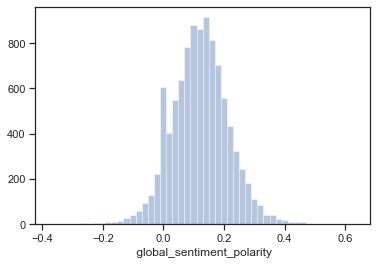

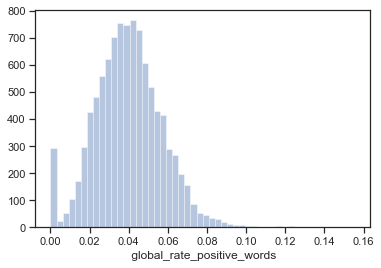

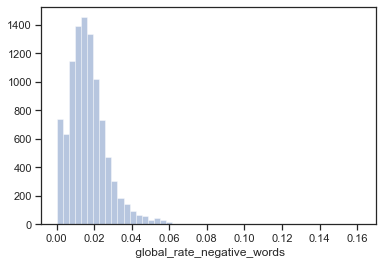

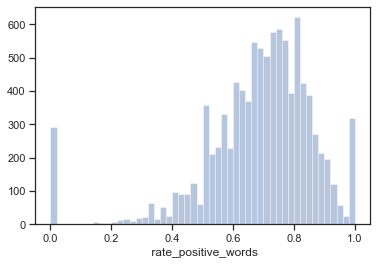

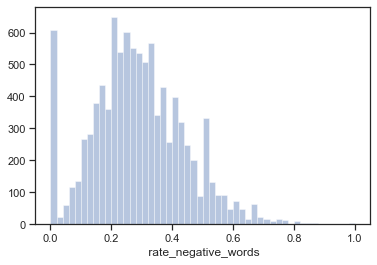

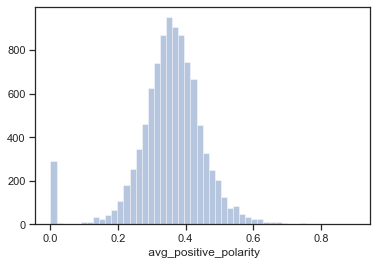

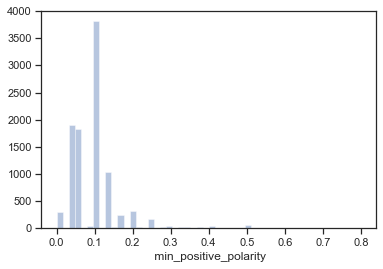

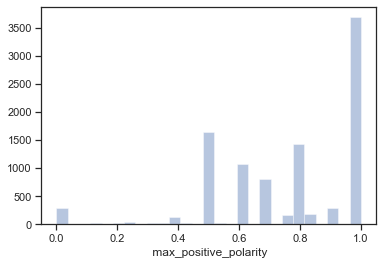

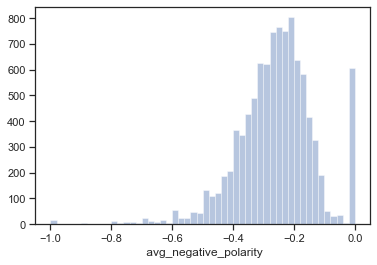

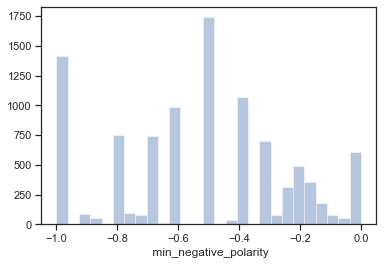

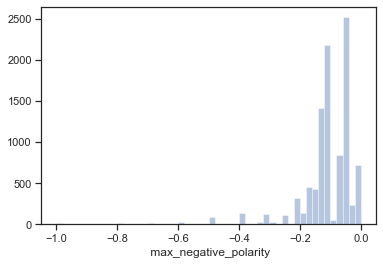

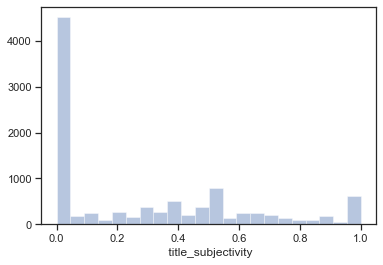

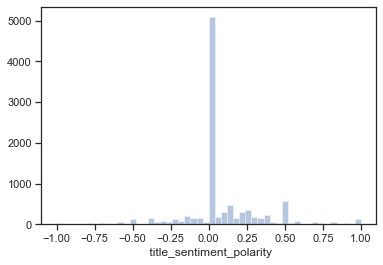

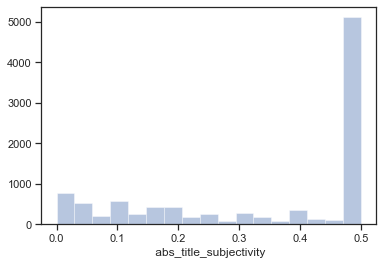

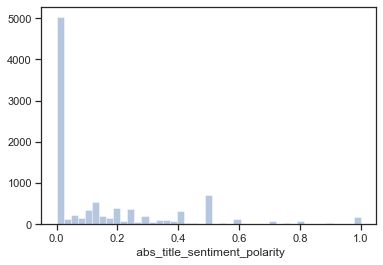

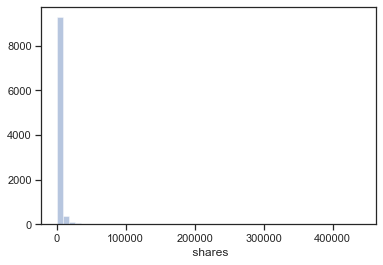

In [7]:
# Plotting All the Variables that are available in raw file
if not os.path.exists('Plots'):
    os.makedirs('Plots')
os.chdir('Plots\\')

for i in range(1,len(temp.columns)):
    if(temp.dtypes[i] in ('float64','int64')):
        plt.figure()
        sns_plot = sns.distplot(temp[temp.columns[i]], kde=False)
        sns_plot.figure.savefig(temp.columns[i]+'.png')
    else:
        plt.figure()
        sns_plot = sns.catplot(x=temp.columns[i], kind="count", palette="ch:.25", data=temp)
        sns_plot.savefig(temp.columns[i]+'.png')

C:\Users\ankit\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ankit\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ankit\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ankit\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ankit\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ankit\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in l

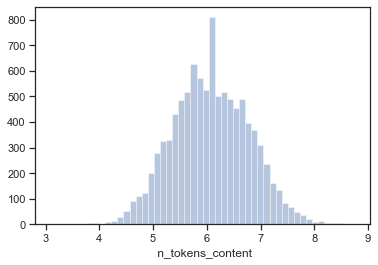

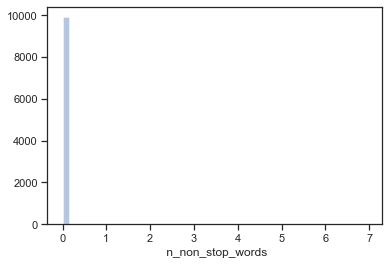

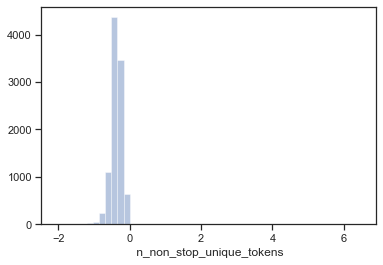

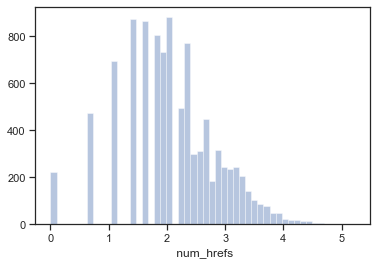

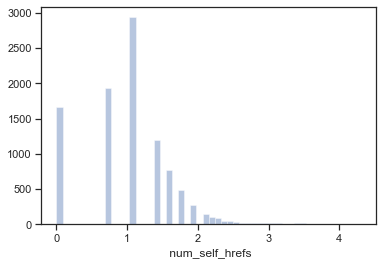

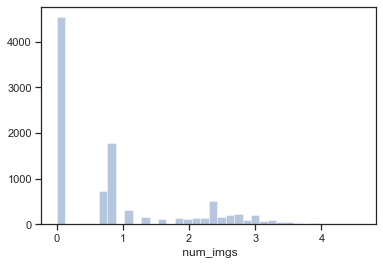

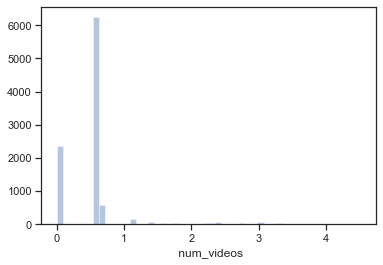

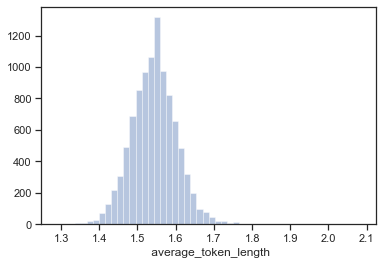

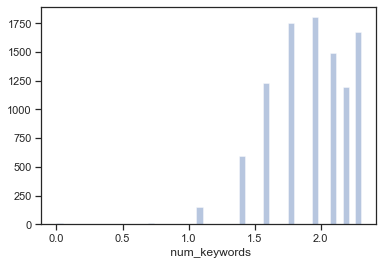

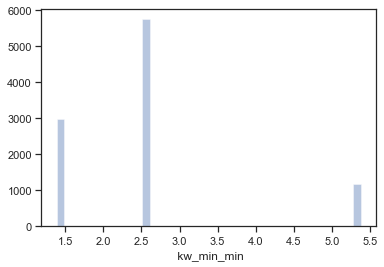

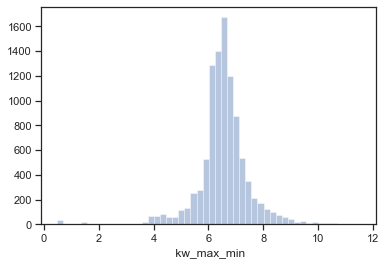

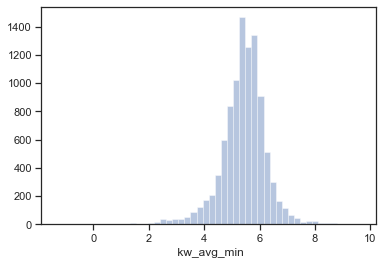

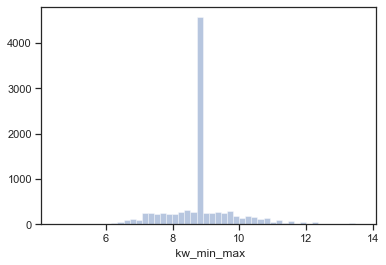

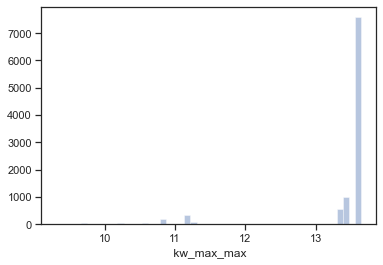

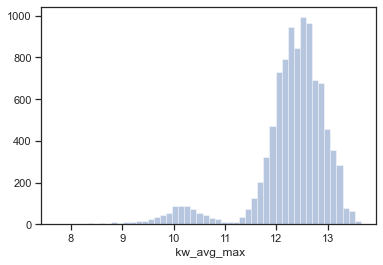

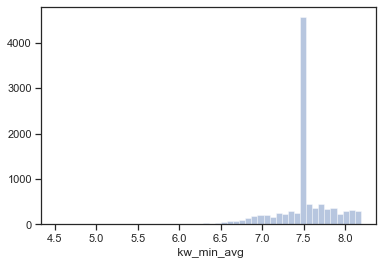

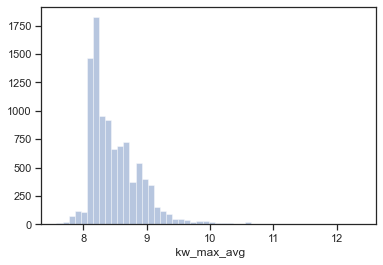

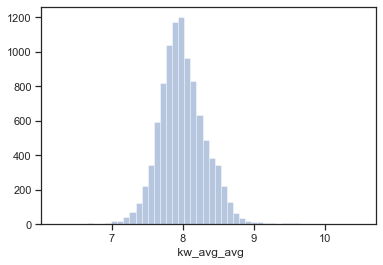

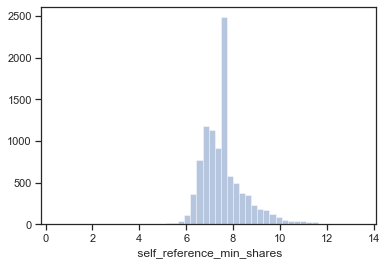

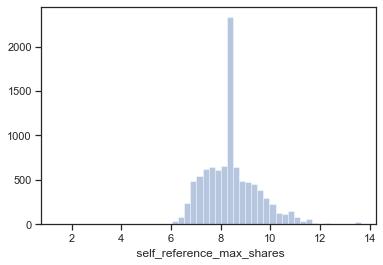

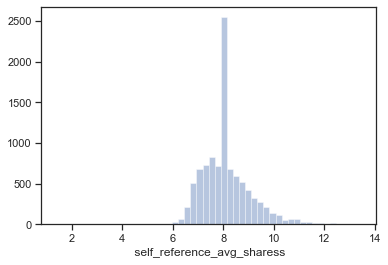

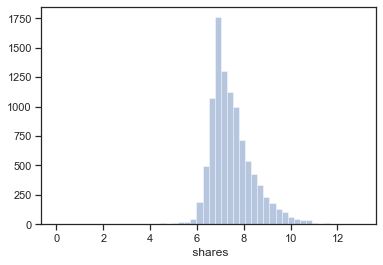

In [8]:


# Log transformation with mean Imputation for Non-Uniform Variables
log_mean_transform_var=[
 ' n_non_stop_words', ' n_non_stop_unique_tokens',' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords','n_unique_tokens',' kw_avg_avg',' kw_avg_max',
    ' kw_avg_min',' kw_max_avg',' kw_max_max',' kw_max_min',
                    ' kw_min_avg',' kw_min_max',' kw_min_min',' self_reference_avg_sharess',
                    ' self_reference_max_shares',' self_reference_min_shares',
                    ' n_tokens_content',' num_hrefs',
                    ' num_self_hrefs',' shares']

# Plotting All the Transformed Variables 
if not os.path.exists('Transformed Plots'):
    os.makedirs('Transformed Plots')
os.chdir('Transformed Plots\\')

import time
for i in range(0,len(temp.columns)):
    if(temp.columns[i] in log_mean_transform_var):
        logtransform=np.log(temp[temp.columns[i]])
        logtransform = logtransform.replace([np.inf, -np.inf], np.nan)
        logtransform = mean_imp.fit_transform(pd.DataFrame(logtransform))
        temp[temp.columns[i]]=logtransform
        temp[temp.columns[i]].fillna(0, inplace = True) 

for i in range(1,len(temp.columns)):
    if(temp.columns[i] in log_mean_transform_var):
        plt.figure()
        sns_plot = sns.distplot(temp[temp.columns[i]], kde=False)
        sns_plot.figure.savefig(temp.columns[i]+'.png')


In [9]:
temp.shape

(9911, 60)

### Feature Selection

In [10]:

# Create correlation matrix
corr_matrix = temp[numeric_variables].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7 & less than -0.7
to_drop_pos = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_neg = [column for column in upper.columns if any(upper[column] < -0.7)]



[0.         0.01691194 0.         0.01229032 0.         0.
 0.         0.06088268 0.02293553 0.01164057 0.00710195 0.
 0.         0.         0.         0.         0.         0.
 0.         0.06618445 0.16242591 0.         0.0330026  0.
 0.         0.01757418 0.         0.01785055 0.         0.02346134
 0.0172842  0.         0.01600349 0.04619237 0.41811781 0.
 0.         0.         0.         0.         0.         0.01556174
 0.         0.02577378 0.0088046 ]


C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


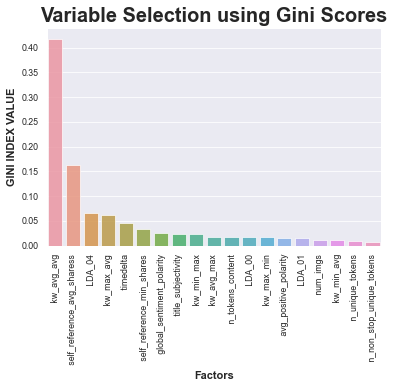

In [11]:
# Drop NaN Value from the temp variable
        
temp=temp.dropna(how='any') 
X = temp.drop(temp.columns[59],axis=1)
y = temp[temp.columns[59]]


# Identify Numeric Values separately
num_only=set(numeric_variables).difference(categoric_variables)
num_only.remove(' shares')

# Decision tree with gini 
clf_entropy = DecisionTreeRegressor( 
             random_state = 100, 
            max_depth = 5, min_samples_leaf = 20) 
  
# Performing training 
clf_entropy.fit(X[num_only], y)
print(clf_entropy.feature_importances_)

p_values = pd.Series(clf_entropy.feature_importances_,index = X[num_only].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.index
plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
pal = sns.color_palette("Greens_d")
sns.set_context("paper")
sns_plot = sns.barplot(p_values.index[p_values>0],p_values[p_values>0],alpha = 0.85)
plt.xticks(rotation=90)
plt.xlabel('Factors', fontsize = 11, weight = 'bold')
plt.ylabel('GINI INDEX VALUE', fontsize = 11, weight = 'bold')
sns_plot.set_title("Variable Selection using Gini Scores", fontsize = 20, weight = 'bold')
sns_plot.figure.savefig('GINI_INDEX'+'.png')

gini_selected=p_values.index[p_values>0.1]
gini_rejected=p_values.index[p_values<=0.1]



[1.48650454e-02 1.86619514e-01 1.78691100e-01 0.00000000e+00
 5.78387110e-02 3.64020581e-01 0.00000000e+00 3.31354338e-03
 3.86730321e-03 3.12043103e-04 3.01029969e-03 0.00000000e+00
 5.92195400e-02 1.28242319e-01]


C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


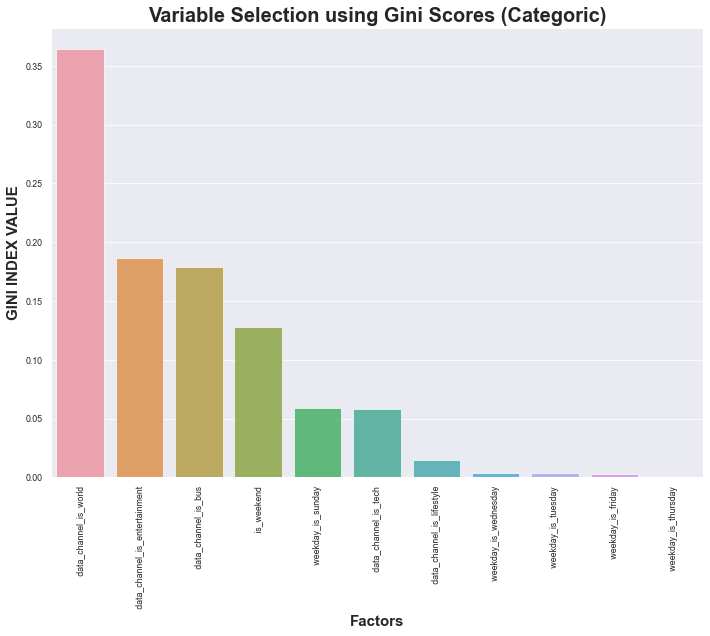

In [12]:
# Selecting Categorical Variables alone for Variable Selection
temp.iloc[:,[12,13,14,15,16,17,30,31,32,33,34,35,36,37]] = temp.iloc[:,[12,13,14,15,16,17,30,31,32,33,34,35,36,37]].astype('category')
temp.iloc[:,[12,13,14,15,16,17,30,31,32,33,34,35,36,37]].apply(LabelEncoder().fit_transform)


t=temp.iloc[:,[12,13,14,15,16,17,30,31,32,33,34,35,36,37]]
# Dropping off NaN Values if Any
t=t.dropna(how='any')

#### We did not use chi square test because chi square requires dependent variables to be categorical
# Using GINI to decide Variables for Categoric Variables
from sklearn.tree import DecisionTreeRegressor 
cat_gini = DecisionTreeRegressor( 
            random_state = 100, 
            max_depth = 5, min_samples_leaf = 20) 
cat_gini.fit(t, y) 
print(cat_gini.feature_importances_)

p_values = pd.Series(cat_gini.feature_importances_,index = t.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.index
plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
pal = sns.color_palette("Greens_d")
sns.set_context("paper")
sns_plot = sns.barplot(p_values.index[p_values>0],p_values[p_values>0],alpha = 0.85)
plt.xticks(rotation=90)
plt.xlabel('Factors', fontsize = 15, weight = 'bold')
plt.ylabel('GINI INDEX VALUE', fontsize = 15, weight = 'bold')
sns_plot.set_title("Variable Selection using Gini Scores (Categoric)", fontsize = 20, weight = 'bold')
sns_plot.figure.savefig('GINI_INDEX_Categoric'+'.png')

gini_selected_cat=p_values.index[p_values>0]
gini_rejected_cat=p_values.index[p_values==0]


In [13]:
rejected_variables=[]
rejected_variables.append(to_drop_pos)
rejected_variables.append(to_drop_neg)
rejected_variables.append(gini_rejected)
rejected_variables.append(gini_rejected_cat)

flattened_list = [y for x in rejected_variables for y in x]
rejected_variables_filter = list(dict.fromkeys(flattened_list))
print(rejected_variables_filter)


print(set(temp.columns).difference(rejected_variables_filter))

final_selection=set(temp.columns).difference(rejected_variables_filter)
final_selection.remove(' shares')

[' n_non_stop_words', ' kw_avg_min', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_avg_avg', ' self_reference_avg_sharess', ' rate_positive_words', ' rate_negative_words', ' max_positive_polarity', ' min_negative_polarity', ' abs_title_sentiment_polarity', ' LDA_04', ' kw_max_avg', ' timedelta', ' self_reference_min_shares', ' global_sentiment_polarity', ' title_subjectivity', ' kw_min_max', ' n_tokens_content', ' LDA_00', ' kw_max_min', ' avg_positive_polarity', ' LDA_01', ' num_imgs', ' n_unique_tokens', ' n_non_stop_unique_tokens', ' num_keywords', ' num_self_hrefs', ' global_subjectivity', ' title_sentiment_polarity', ' kw_min_min', ' avg_negative_polarity', ' self_reference_max_shares', ' num_hrefs', ' LDA_03', ' global_rate_negative_words', ' LDA_02', ' num_videos', ' min_positive_polarity', ' abs_title_subjectivity', ' global_rate_positive_words', ' max_negative_polarity', ' average_token_length', ' n_tokens_title', ' data_channel_is_socmed', ' weekday_is_monday', ' weekday_

### Modelling

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X[final_selection], y, test_size=0.3, random_state=30)

In [15]:
X_test = X_test[y_test!=0] # to avoid MAPE=inf in last step of the code
y_test = y_test[y_test!=0]

In [16]:

from statsmodels.api import OLS
model1 = OLS(y_train,X_train.astype(float)).fit()
results1=model1.summary(alpha=0.05)
print(results1)

                                 OLS Regression Results                                
Dep. Variable:                 shares   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              4474.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):                        0.00
Time:                        14:49:00   Log-Likelihood:                         -16603.
No. Observations:                6937   AIC:                                  3.323e+04
Df Residuals:                    6926   BIC:                                  3.330e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

### Validation

In [17]:
y_pred_test = model1.predict(X_test.astype(float))


In [18]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [19]:
def regression_results(y_true, y_pred):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    MAPE = mean_absolute_percentage_error(y_true,y_pred)
    print('MAPE', MAPE )
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


In [20]:
print('------------------------------')
print('TESTING RESULTS OF LINEAR REGRESSION MODEL')
regression_results(y_test,y_pred_test)


------------------------------
TESTING RESULTS OF LINEAR REGRESSION MODEL
MAPE 26.1826805208491
MAE:  1.9459
MSE:  6.6817
RMSE:  2.5849


### Conclusions

#### Following variables are significantly impacting Total Share count of article.

data_channel_is_entertainment , is_weekend , weekday_is_tuesday , weekday_is_thursday , data_channel_is_tech , data_channel_is_bus
, weekday_is_wednesday , data_channel_is_world, weekday_is_friday , data_channel_is_lifestyle, 

#### Around 88% variation can be explained by selected feature if we perform necessary pre-processing.